# Topic Modeling on Video Game Reviews in 2025
In this project, we will download the 2025 video game reviews and began with some exploratory analysis.

## Import the Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("artermiloff/steam-games-dataset")

print("Path to dataset files:", path)

100%|██████████| 418M/418M [00:12<00:00, 36.5MB/s] 

Extracting files...


Path to dataset files: C:\Users\sarah\.cache\kagglehub\datasets\artermiloff\steam-games-dataset\versions\2


In [2]:
# List files in the dataset directory
import os
print(os.listdir(path))

['games_march2025_cleaned.csv', 'games_march2025_full.csv', 'games_may2024_cleaned.csv', 'games_may2024_full.csv']


In [5]:
import pandas as pd

games_df = pd.read_csv(os.path.join(path, 'games_march2025_cleaned.csv'))
# print(games_df.head())
games_df.head()

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,682,2434,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608


In [4]:
print(games_df.dtypes)

appid                         int64
name                         object
release_date                 object
required_age                  int64
price                       float64
dlc_count                     int64
detailed_description         object
about_the_game               object
short_description            object
reviews                      object
header_image                 object
website                      object
support_url                  object
support_email                object
windows                        bool
mac                            bool
linux                          bool
metacritic_score              int64
metacritic_url               object
achievements                  int64
recommendations               int64
notes                        object
supported_languages          object
full_audio_languages         object
packages                     object
developers                   object
publishers                   object
categories                  

In [6]:
games_df[['appid', 'name', 'achievements', 'recommendations']].head()

,appid,name,achievements,recommendations
0,730,Counter-Strike 2,1,4401572
1,578080,PUBG: BATTLEGROUNDS,37,1732007
2,570,Dota 2,0,14337
3,271590,Grand Theft Auto V Legacy,77,1803063
4,359550,Tom Clancy's Rainbow Six® Siege,0,1165929


In [7]:
num_unique_games = games_df['appid'].nunique()
print("Number of unique games:", num_unique_games)

Number of unique games: 89618


In [ ]:
# Check the shape of the DataFrame
games_df.shape

(89618, 47)

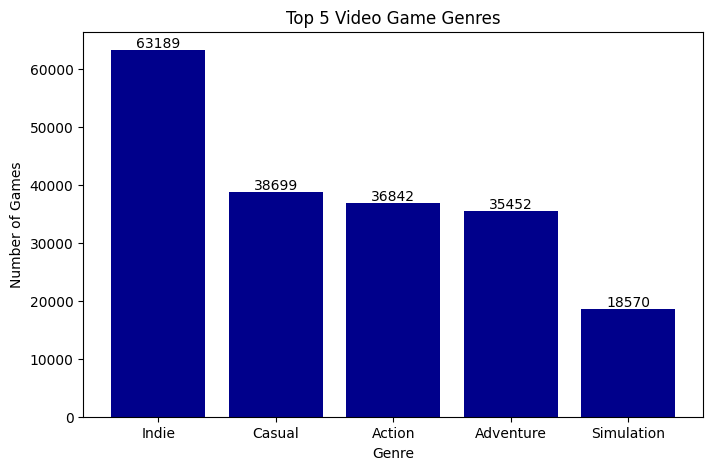

In [13]:
from collections import Counter

import matplotlib.pyplot as plt

# Flatten the list of genres and count occurrences
all_genres = [genre for sublist in games_df['genres'] for genre in eval(sublist)]
genre_counts = Counter(all_genres)
top_5 = genre_counts.most_common(5)

# Prepare data for plotting
genres, counts = zip(*top_5)

# Plotting the top 5 genres
plt.figure(figsize=(8, 5))
bars = plt.bar(genres, counts, color='darkblue')
plt.title('Top 5 Video Game Genres')
plt.ylabel('Number of Games')
plt.xlabel('Genre')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

In [14]:
import pandas as pd

# Create a frequency table of all genres

genre_freq_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Frequency'])
genre_freq_df = genre_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
genre_freq_df

,Genre,Frequency
0,Indie,63189
1,Casual,38699
2,Action,36842
3,Adventure,35452
4,Simulation,18570
5,Strategy,17366
6,RPG,16342
7,Early Access,9113
8,Free To Play,8867
9,Sports,3939


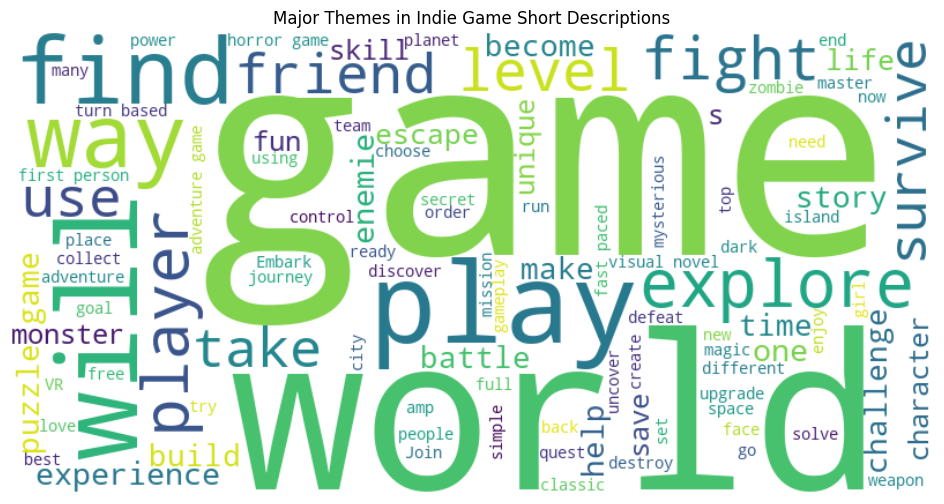

In [15]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

# Filter games with 'Indie' in their genres
indie_games = games_df[games_df['genres'].str.contains("'Indie'")]

# Combine all short descriptions into one string
text = ' '.join(indie_games['short_description'].dropna().tolist())

# Generate a word cloud, removing common stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=100).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Major Themes in Indie Game Short Descriptions')
plt.show()